In [476]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [477]:
home_prices_df = pd.read_csv('homeprices_banglore.csv')

home_prices_df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [478]:
home_prices_df.sample(5)

,area,bedrooms,price
18,2770,3,102.0
5,1170,2,38.0
14,2250,3,101.0
8,1310,3,50.0
13,1100,2,40.0


In [479]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(home_prices_df.drop(columns=['price']))

scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [480]:
scaled_y = sy.fit_transform(home_prices_df['price'].values.reshape(home_prices_df.shape[0], 1))

scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [481]:
train_x, test_x, train_y, test_y = train_test_split(home_prices_df.drop(columns=['price']), home_prices_df['price'], test_size=0.2)

In [482]:
np.ones(shape=(2))

array([1., 1.])

In [483]:
def sigmoid_np(nparr):
    return 1 / (1 + np.exp(nparr))

In [484]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [485]:
scaled_x.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [703]:
def batch_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    n_features = x.shape[1]
    w = np.ones(shape=(n_features))
    b = 0
    n = len(x)
    total_samples = x.shape[0]
    costs = []
    epoch_list = []

    for i in range(epochs):

        y_predicted = np.dot(w, scaled_x.T) + b


        print(x.shape, y_true.shape, y_predicted.shape, x.T.shape)
        w_partial_derivative = -(2 / total_samples) * (x.T.dot(y_true - y_predicted))
        b_partial_derivative = -(2 / total_samples) * np.sum(y_true - y_predicted)

        w = w - learning_rate * w_partial_derivative
        b = b - learning_rate * b_partial_derivative

        errors = y_true - y_predicted
        cost = np.mean(np.square(errors))
        costs.append(cost)
        epoch_list.append(i)
    return w, b, cost, costs, epoch_list


weights, bias, cost, cost_list, epoch_list = batch_gradient_descent(train_x, train_y, 500)


(16, 2) (16,) (20,) (2, 16)


ValueError: operands could not be broadcast together with shapes (16,) (20,) 

In [693]:
weights, bias, cost, costs, epochs = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 50000)

weights, bias, cost, costs, epochs

(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) (2, 20)
(20, 2) (20,) (20,) 

(array([0.92247807, 0.20248199]),
 -0.07403551495455686,
 0.0028856886825652465,
 [0.2768777174681,
  0.262766734572546,
  0.24942344132744515,
  0.2368059263026728,
  0.22487456675994816,
  0.21359190367012681,
  0.20292252355565982,
  0.19283294678550084,
  0.18329152197010132,
  0.17426832612337637,
  0.16573507027671067,
  0.15766501024727825,
  0.15003286227920162,
  0.14281472329145126,
  0.13598799548091794,
  0.12953131504282422,
  0.12342448478363385,
  0.11764841041389311,
  0.1121850403200481,
  0.10701730862525383,
  0.10212908135956808,
  0.09750510556972952,
  0.09313096120799244,
  0.0889930156482579,
  0.0850783806860264,
  0.08137487188653422,
  0.07787097015284175,
  0.0745557853926442,
  0.07141902216919618,
  0.0684509472280001,
  0.06564235879682481,
  0.0629845575622148,
  0.060469319230939046,
  0.058088868589827244,
  0.05583585498216923,
  0.05370332912331893,
  0.05168472118237236,
  0.04977382006077925,
  0.04796475380252592,
  0.04625197107409537,
  0.044630

Text(0, 0.5, 'Cost')

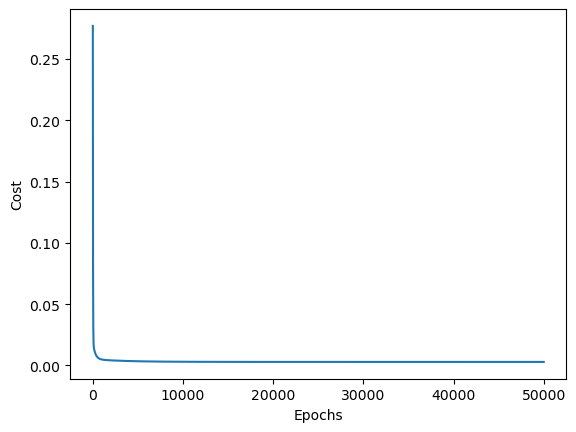

In [488]:
%matplotlib inline

plt.plot(epochs, costs)
plt.xlabel("Epochs")
plt.ylabel("Cost")

In [489]:
def predict(area, bedrooms, w, b):
    scaled_x = [area, bedrooms]
    scaled_x = sx.transform([scaled_x])[0]

    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + bias
    return sy.inverse_transform([[scaled_price]])[0][0]


print(weights, bias)
predict(2000, 3, weights, bias)

[0.92247807 0.20248199] -0.07403551495455686


c:\Users\flyin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


87.2042732577684

In [490]:
home_prices_df.head(50)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [684]:
import random

def stochastic_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    number_of_features = x.shape[1]

    w = np.ones(shape=(number_of_features)) ## set all weights to 1
    b = 0 # initialize bias to 0

    total_samples = x.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, total_samples - 1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b
        w_pd = -(2/total_samples) * (sample_x.T.dot(sample_y-y_predicted)) # 2/n (2 because we are calculating both weights, w1 and w2) * (sample_x transposed, meaning it transforms from a 1,2 to 2,1) and the dot product of sample_y - y_predicted, which computes to diff of sample_y and y_predicted, so it's [w1*diff, w2*diff]
        b_pd = -(2/total_samples) * (sample_y - y_predicted)
        print(w_pd)

        w = w - learning_rate * w_pd
        b = b - learning_rate * b_pd

        cost = np.square(sample_y - y_predicted)
        cost_list.append(cost)
        epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list



sgd_weights, sgd_bias, sgd_cost, sgd_cost_list, sgd_epoch_list = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 10000)

sgd_weights, sgd_bias, sgd_cost


[0.00671573 0.0256258 ]
[0.01396067 0.02735536]
[0.09982038 0.09982038]
[0.0138976  0.02723178]
[0.04319658 0.04862969]
[0.04424088 0.05345773]
[0.04290919 0.04701636]
[0.04282204 0.04692087]
[0.00297636 0.00719286]
[0.01376789 0.02697763]
[0.04276804 0.04814725]
[0.04384777 0.05298272]
[0.00413312 0.00809868]
[0.04256177 0.04791504]
[0.00243402 0.00689321]
[0.00326193 0.00591224]
[0.013647   0.02674075]
[0.04356769 0.05264429]
[0.00291619 0.00704745]
[0.04226228 0.04757788]
[0.04338312 0.05242127]
[0.00924869 0.02629529]
[0.00649271 0.02477483]
[0.0418447  0.04584998]
[0.00373531 0.0072216 ]
[-0. -0.]
[0.00920408 0.02616846]
[0.00645988 0.02464954]
[0.00918125 0.02610356]
[0.09684055 0.09684055]
[0.01049077 0.02376816]
[0.04152308 0.0467457 ]
[0.00367403 0.00710312]
[0.00639813 0.0244139 ]
[0.04263718 0.05151992]
[0.01002415 0.02015953]
[0.00364556 0.00704808]
[0.05728815 0.04984069]
[0.00393831 0.00771695]
[0.01036268 0.02347795]
[0.00902965 0.02567253]
[0.00633191 0.02416122]
[0.040

(array([0.70584354, 0.67141909]), -0.22926610240954598, 0.009480124524932862)

In [492]:
weights, bias, cost

(array([0.92247807, 0.20248199]), -0.07403551495455686, 0.0028856886825652465)

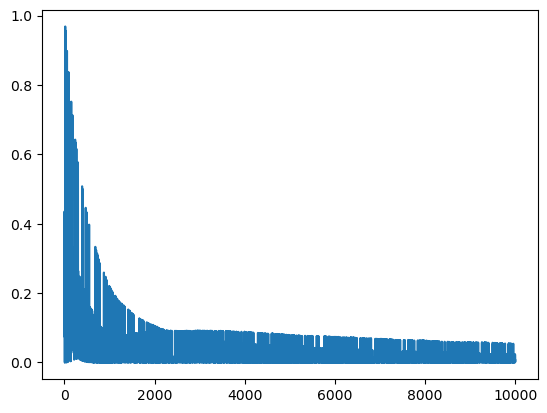

In [493]:
plt.plot(sgd_epoch_list, sgd_cost_list)

In [494]:
predict(2600, 4, sgd_weights, sgd_bias)

c:\Users\flyin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


149.83916195262847

In [495]:
train_x.head()

,area,bedrooms
4,1200,2
14,2250,3
13,1100,2
2,1440,3
7,3300,4


In [702]:
def mini_batch_gradient_descent(x, y, epochs, learning_rate = 0.0, batch_size = None):
    w = np.ones(shape=(x.shape[1])) # setup the weights, number of columns because that matches the shape of the transposed batch (2 columns, which turns into 2 rows and x amount of columns)
    b = 0 # setup the bias

    cost_list = []
    epoch_list = []
    total_samples = len(x)
    if batch_size is None:
        batch_size = random.randint(2, x.shape[0] - 2)

    for i in range(epochs):
        random_indexes = random.sample(range(2, x.shape[0]), batch_size)
        batch_x = x.iloc[random_indexes]
        batch_y = y.iloc[random_indexes]

        y_predicted = np.dot(w, batch_x.T) + bias # the weighted sum, the linear function of the neuron
        weight_pd = -(2/total_samples) * batch_x.T.dot(y_predicted - batch_y)
        bias_partial_derivative = -(2 / total_samples) * np.sum(batch_y - y_predicted)
        w = w - learning_rate * weight_pd
        b = b - learning_rate * bias_partial_derivative
        errors = batch_y - y_predicted
        cost = np.mean(np.square(errors)) # MSE Algorithm
        cost_list.append(cost)
        epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list)


mini_batch_gradient_descent(train_x, train_y, 50)

array([1., 1.])